First 5 rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Feature Types:
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


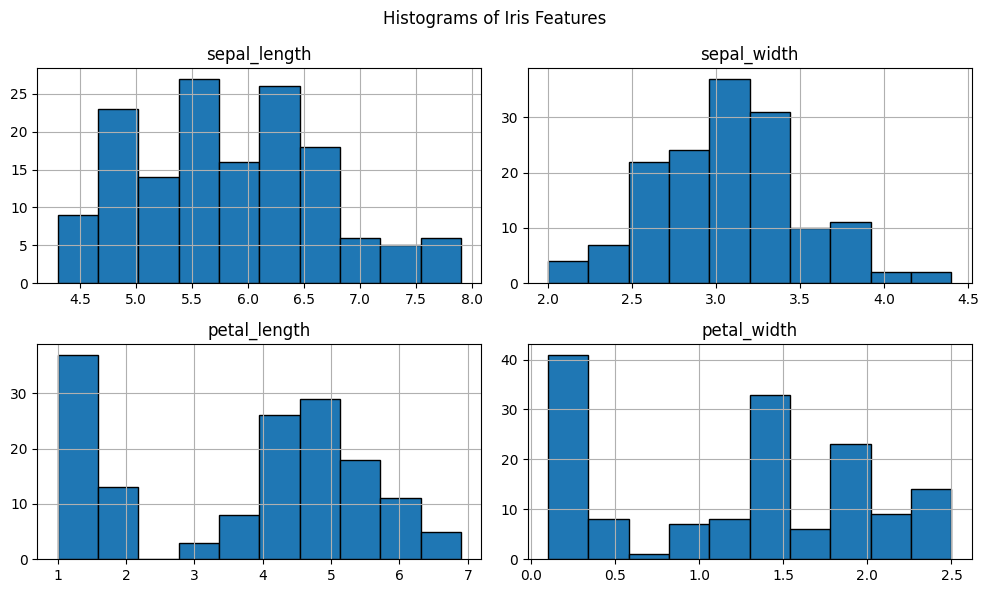

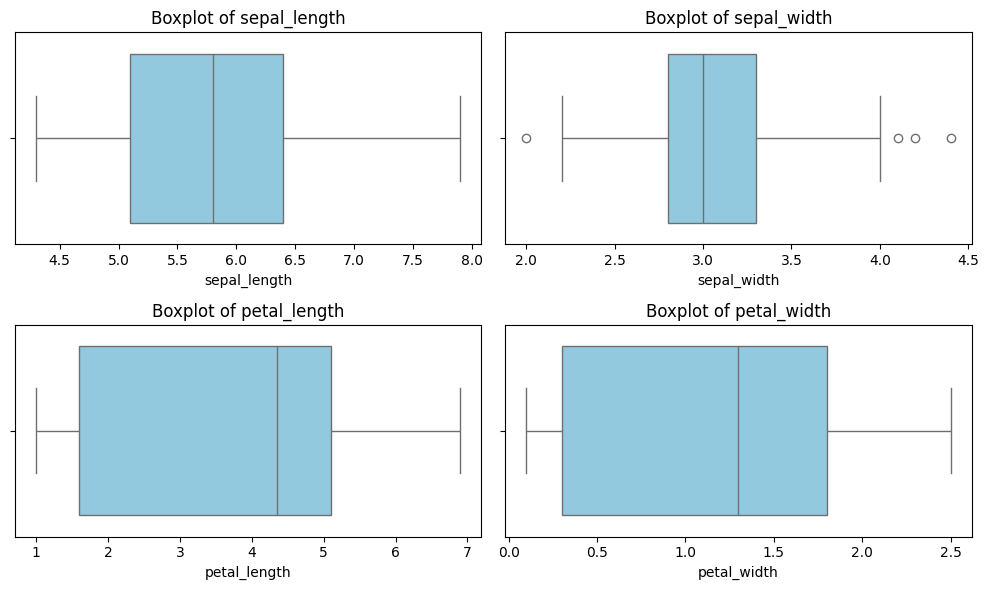


Outlier Detection using IQR Method:
sepal_length: 0 outliers
sepal_width: 4 outliers
    sepal_width     species
15          4.4      setosa
32          4.1      setosa
33          4.2      setosa
60          2.0  versicolor
petal_length: 0 outliers
petal_width: 0 outliers


In [1]:
# iris_visualization.py or iris_visualization.ipynb

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset
df = sns.load_dataset('iris')
print("First 5 rows of the dataset:")
print(df.head())

# Step 1: List features and their types
print("\nFeature Types:")
print(df.dtypes)

# Step 2: Histogram for each feature
df.hist(figsize=(10, 6), edgecolor='black')
plt.suptitle("Histograms of Iris Features")
plt.tight_layout()
plt.show()

# Step 3: Boxplot for each feature
plt.figure(figsize=(10, 6))
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[column], color='skyblue')
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

# Step 4: Compare Distributions and Identify Outliers using IQR method
print("\nOutlier Detection using IQR Method:")
for column in df.select_dtypes(include='float'):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"{column}: {len(outliers)} outliers")
    if not outliers.empty:
        print(outliers[[column, 'species']])
